In [94]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from collections import defaultdict

np.random.seed(42) 







In [89]:

data = pd.read_csv("data/TCGAdata.txt", sep=" ")
labels = pd.read_csv("data/TCGAlabels", sep=" ")

data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V1991,V1992,V1993,V1994,V1995,V1996,V1997,V1998,V1999,V2000
1,-1.168003,1.261756,-1.534537,-0.156028,-0.700344,3.985627,2.432774,0.767859,1.225563,-0.198581,...,-0.015099,-0.217915,0.123574,-3.209894,-1.26123,-1.676247,-0.8625,-1.103947,-1.109631,0.43515
2,-3.272103,-0.269244,-1.534537,-0.679228,-0.947544,0.794827,0.067374,0.033459,-0.010137,-0.198581,...,0.285601,-0.155615,1.044074,-3.209894,-2.37073,1.973753,-1.9055,-1.103947,-1.109631,0.89295
3,-0.861503,-0.189544,-1.534537,0.010572,-0.268144,1.808827,1.273274,-0.501841,0.753163,-0.198581,...,-1.816599,-0.217015,0.023974,-3.209894,-0.27183,0.245753,-1.2135,-1.103947,-1.109631,-0.45655
4,-0.595803,-0.580044,-1.534537,-0.107828,-0.475644,0.738027,-1.945726,0.476859,-0.010137,-0.198581,...,-0.532399,-0.402215,-0.410726,-3.209894,0.36967,1.586153,-0.5700,-1.103947,1.215569,0.45415
5,1.336097,0.360556,-1.534537,-0.097728,0.359656,-0.940173,0.378774,-0.271741,-0.010137,-0.198581,...,-0.894799,0.043385,0.273874,-0.747594,-0.46893,-0.481547,0.6180,-1.103947,-0.392031,-0.88775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2883,-2.407703,-0.630444,-1.534537,-0.746028,-0.615444,2.733027,-2.976926,0.433959,-0.010137,-0.198581,...,-1.537899,0.185685,-1.025226,2.214606,-0.20143,4.214753,-2.8351,2.170853,-1.109631,0.21915
2884,0.626397,0.546456,-1.534537,0.291672,1.228856,1.607627,-0.696826,-0.359341,-0.010137,-0.198581,...,-3.281399,-0.248515,-0.691026,0.352406,0.52507,3.099053,-2.4853,-1.103947,1.709069,-1.31475
2885,-0.247003,1.178056,-1.534537,-0.232828,1.647956,3.450627,-0.517526,0.094659,-0.010137,-0.198581,...,-2.792999,-0.121515,-0.475626,1.095506,-1.49993,3.473553,2.9253,-1.103947,1.492969,-0.15755
2886,-0.765003,-0.291644,-0.409837,-0.533628,2.256756,1.657427,-3.786426,-2.083541,-0.010137,-0.198581,...,0.963001,-0.013315,0.250774,0.400806,-0.51443,3.139053,-2.9320,-1.103947,-1.109631,0.11055


In [87]:
noise = np.random.normal(0, data.std(), data.shape)
data = data + noise * 5
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V1991,V1992,V1993,V1994,V1995,V1996,V1997,V1998,V1999,V2000
1,1.947961,2.843974,-15.017864,0.364369,0.185870,1.656290,3.514836,3.364754,1.082224,-2.840273,...,-1.125909,-0.522084,-0.415957,9.738544,-0.227361,-2.536705,-0.416459,-2.722105,-2.353451,-1.183272
2,-3.454743,2.263844,37.375483,-0.350529,-0.933003,-2.964893,2.896466,0.241822,-0.027564,-0.688965,...,-3.668951,0.403193,0.878130,-3.058617,-1.693315,3.668273,1.009194,0.379163,-3.777399,1.902511
3,-0.618058,0.671693,4.814628,-0.660438,-1.669549,-6.914796,6.282641,1.175103,0.835862,-0.837244,...,-1.377648,-0.990721,-0.122921,-0.494074,0.977821,0.826739,1.671422,-1.217432,2.901212,-2.149961
4,-0.897448,-1.884290,-15.932983,0.206343,-0.051013,3.158158,1.011478,0.955590,0.025666,-0.345051,...,0.565166,0.042613,0.496379,-1.642167,2.178635,2.825621,-6.256220,-1.591752,0.563296,2.445593
5,-0.430304,2.216530,12.534839,-0.537421,3.214737,-3.941977,1.105809,0.708127,0.143160,-1.781228,...,0.015669,2.002883,0.254595,5.072506,1.695436,-5.613557,9.474696,-2.391966,-3.568061,0.107715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2883,-2.579602,-3.360167,4.870719,0.321619,1.183632,6.864637,-5.733053,2.072930,-0.317451,-1.270383,...,-3.648299,0.808463,0.339837,0.993238,-2.142220,1.245287,3.409592,2.121235,0.446360,1.014062
2884,0.438797,1.444179,8.671410,-0.285013,0.395102,2.123085,2.666790,-0.666741,-0.000708,-0.942121,...,-1.950171,-1.035793,2.196596,-2.609298,0.491016,-3.775855,-2.106451,-0.886647,1.833445,-0.419338
2885,-0.428828,1.078485,2.595441,0.195577,0.702922,-0.992379,-2.717656,0.821269,-0.112224,1.260620,...,-5.290622,0.008503,0.661571,1.614348,-2.629823,-0.593158,2.475996,0.311282,1.973692,-1.544746
2886,0.605156,-0.802229,-14.198766,-0.282762,-2.055507,0.192849,-8.426795,-3.043532,-0.133939,0.297484,...,-2.271525,0.618946,1.008184,5.854322,0.331312,1.306533,-7.299590,-3.798548,-1.867352,1.641916


In [210]:

accuracy = []
cross_val_scores = []
scaling_factors = [10, 5, 4, 3, 2, 1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05]
scaling_factors = [0.1]
for val in scaling_factors:

    noise = np.random.normal(0, data.std(), data.shape)
    noised_data = data + noise * val

    X_train, X_test, y_train, y_test = train_test_split(noised_data, labels, test_size=0.2)
    
    random_forest = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_features=0.1)
    cross_val = cross_val_score(random_forest, X_train, y_train.values.ravel(), cv=5)
    cross_val_scores.append(cross_val)
    random_forest.fit(X_train, y_train.values.ravel())

    print("Random Forest accuracy: ", accuracy_score(y_test, random_forest.predict(X_test)), "for noise: ", val)
    accuracy.append(accuracy_score(y_test, random_forest.predict(X_test)))
    

Random Forest accuracy:  0.9913494809688581 for noise:  0.1


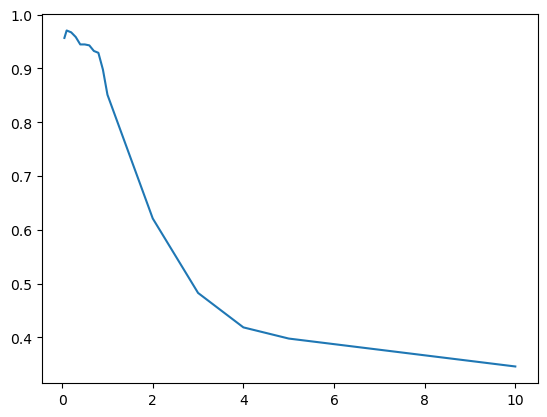

In [106]:
import matplotlib.pyplot as plt

plt.plot(scaling_factors, accuracy)


<AxesSubplot:>

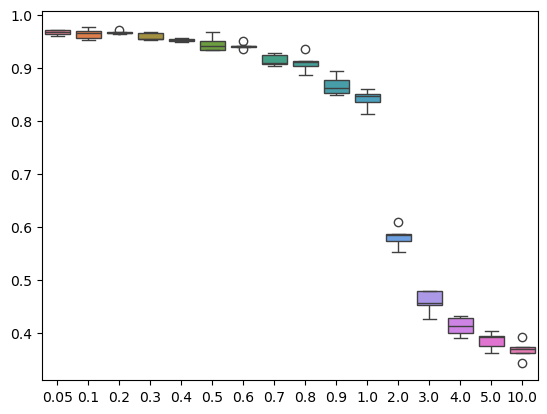

In [107]:
import seaborn as sns

# create a pandas dataframe for this
df = pd.DataFrame(cross_val_scores, index=scaling_factors)
# boxplot
sns.boxplot(data=df.T)


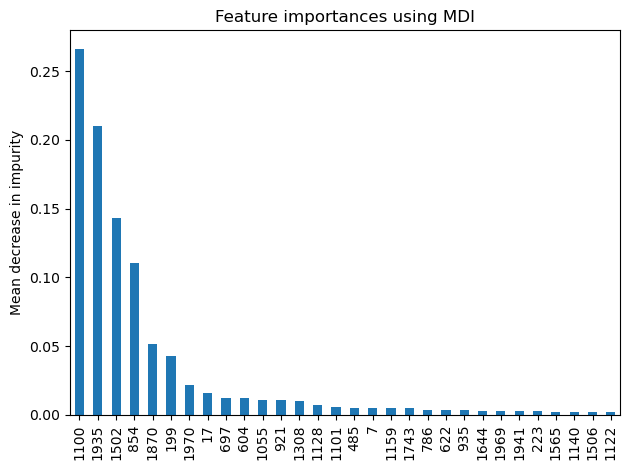

In [223]:
importances = random_forest.estimators_[2].feature_importances_


forest_importances = pd.Series(importances)

# sort importances and stds in descending order based on forest_importances
forest_importances = forest_importances.sort_values(ascending=False).head(30)



fig, ax = plt.subplots()
forest_importances.plot(kind='bar')
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [226]:
sum(random_forest.estimators_[3].feature_importances_ == 0.0)

1947

In [229]:
from sklearn.metrics import f1_score
f1_score(y_test, random_forest.predict(X_test), average=None)

array([0.99203187, 0.98412698, 0.9877551 , 0.99547511, 1.        ,
       0.95238095])

In [ ]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(random_forest, X_test, y_test)

# Get feature importances for a specific class (e.g., class 0)
class_0_importance = perm_importance.importances[0]

# Get indices of features sorted by importance for class 0
class_0_indices_sorted_by_importance = np.argsort(class_0_importance)[::-1]

# Get the names of features
feature_names = data.feature_names

# Get top n features for class 0
n_top_features = 5
top_features_class_0 = [feature_names[i] for i in class_0_indices_sorted_by_importance[:n_top_features]]

print("Top features for class 0:")
print(top_features_class_0)
